**Load The Data**

*   List item
*   List item



In [1]:
import pandas as pd
import numpy as np
import cv2  # OpenCV for loading images

training_file = training_file = r"C:/Users/Reshma Maddu/OneDrive/ml lab/proje t/archive/Train.csv"
testing_file = training_file = r"C:/Users/Reshma Maddu/OneDrive/ml lab/proje t/archive/Test.csv"

# Assuming 'Train.csv' and 'Test.csv' contain image paths and labels
train = pd.read_csv(training_file)
test = pd.read_csv(testing_file)
print(train)
# Define paths to image directories if available
train_image_dir = r"C:/Users/Reshma Maddu/OneDrive/ml lab/proje t/dataset/Test"  # adjust as needed

# Or using forward slashes
test_image_dir = "C:/Users/Reshma Maddu/OneDrive/ml lab/proje t/dataset/Test"  # adjust as needed

# Function to load and resize images
def load_and_resize_image(file_path, target_size=(32, 32)):
    image = cv2.imread(file_path)
    if image is not None:
        image = cv2.resize(image, target_size)
        return image
    else:
        return np.zeros((*target_size, 3), dtype=np.uint8)  # Fallback if image not found
print("hi")
# Loading and resizing images from paths in the DataFrame
X_train = np.array([load_and_resize_image(train_image_dir + img_path) for img_path in train['Path']])
y_train = train['ClassId'].values

X_test = np.array([load_and_resize_image(test_image_dir + img_path) for img_path in test['Path']])
y_test = test['ClassId'].values

# Displaying information
print("Image Shape: {}".format(X_train[0].shape))
print("Training Set:   {} samples".format(len(X_train)))
print("Test Set:       {} samples".format(len(X_test)))


       Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0         27      26       5       5      22      20       20   
1         28      27       5       6      23      22       20   
2         29      26       6       5      24      21       20   
3         28      27       5       6      23      22       20   
4         28      26       5       5      23      21       20   
...      ...     ...     ...     ...     ...     ...      ...   
39204     52      56       5       6      47      51       42   
39205     56      58       5       5      51      53       42   
39206     58      62       5       6      53      57       42   
39207     63      69       5       7      58      63       42   
39208     68      69       7       6      62      63       42   

                                 Path  
0      Train/20/00020_00000_00000.png  
1      Train/20/00020_00000_00001.png  
2      Train/20/00020_00000_00002.png  
3      Train/20/00020_00000_00003.png  
4      Train/20/000

In [ ]:
import pandas as pd
import numpy as np
import cv2

# Load CSV files
training_file = r"C:/Users/Reshma Maddu/OneDrive/ml lab/proje t/archive/Train.csv"
testing_file = r"C:/Users/Reshma Maddu/OneDrive/ml lab/proje t/archive/Test.csv"

# Assuming 'Train.csv' and 'Test.csv' contain image paths and labels
train = pd.read_csv(training_file)
test = pd.read_csv(testing_file)

# Printing the train data to verify it has been loaded correctly
print(train.head())  # Adjusted to show the first few rows for debugging

# Define paths to image directories if available
train_image_dir = r"C:/Users/Reshma Maddu/OneDrive/ml lab/proje t/archive/Train"  # adjust as needed
test_image_dir = r"C:/Users/Reshma Maddu/OneDrive/ml lab/proje t/archive/Test"  # adjust as needed

# Function to load and resize images
def load_and_resize_image(file_path, target_size=(32, 32)):
    image = cv2.imread(file_path)  # Read the image
    if image is not None:
        image = cv2.resize(image, target_size)  # Resize the image to the target size
        return image
    else:
        return np.zeros((*target_size, 3), dtype=np.uint8)  # Return a black image if not found

# Loading and resizing images from paths in the DataFrame
X_train = np.array([load_and_resize_image(train_image_dir + '\\' + img_path) for img_path in train['Path']])
y_train = train['ClassId'].values

X_test = np.array([load_and_resize_image(test_image_dir + '\\' + img_path) for img_path in test['Path']])
y_test = test['ClassId'].values

# Displaying information
print("Image Shape: {}".format(X_train[0].shape))  # Prints the shape of the first image
print("Training Set:   {} samples".format(len(X_train)))  # Number of training samples
print("Test Set:       {} samples".format(len(X_test)))  # Number of test samples


In [11]:
!pip install opencv-python


  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.8 MB ? eta -:--:--
    --------------------------------------- 0.8/38.8 MB 2.4 MB/s eta 0:00:16
   - -------------------------------------- 1.3/38.8 MB 2.4 MB/s eta 0:00:16
   - -------------------------------------- 1.8/38.8 MB 2.4 MB/s eta 0:00:16
   -- ------------------------------------- 2.1/38.8 MB 2.3 MB/s eta 0:00:16
   -- ------------------------------------- 2.6/38.8 MB 2.3 MB/s eta 0:00:16
   --- ------------------------------------ 3.1/38.8 MB 2.3 MB/s eta 0:00:16
   --- ------------------------------------ 3.7/38.8 MB 2.3 MB/s eta 0:00:16
   ---- ----------------------------------- 4.2/38.8 MB 2.3 MB/s eta 0:00:15
   ---- ----------------------------------- 4.7/38.8 MB 2.3 MB/s eta 0:00:15
   ----- ---------------------------------- 5.0/38.8 MB 2.3 MB/s eta 0:00:15
   ----- -

In [2]:
# pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

!pip install --upgrade pip


In [3]:
!pip install torch torchvision torchaudio


In [4]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

# Custom Dataset Class
class TrafficSignDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = torch.tensor(images, dtype=torch.float32).permute(0, 3, 1, 2)  # Convert to (N, C, H, W)
        self.labels = torch.tensor(labels, dtype=torch.long)
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# CNN Model Definition
class TrafficSignCNN(nn.Module):
    def __init__(self, num_classes):
        super(TrafficSignCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 8 * 8, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x


**Dataset Summary & Exploration**

In [6]:
### Replace each question mark with the appropriate value.
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
# Get image shape from the shape of the first training image
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train)) # Getting unique classes/labels

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


**Include an exploratory visualization of the dataset**

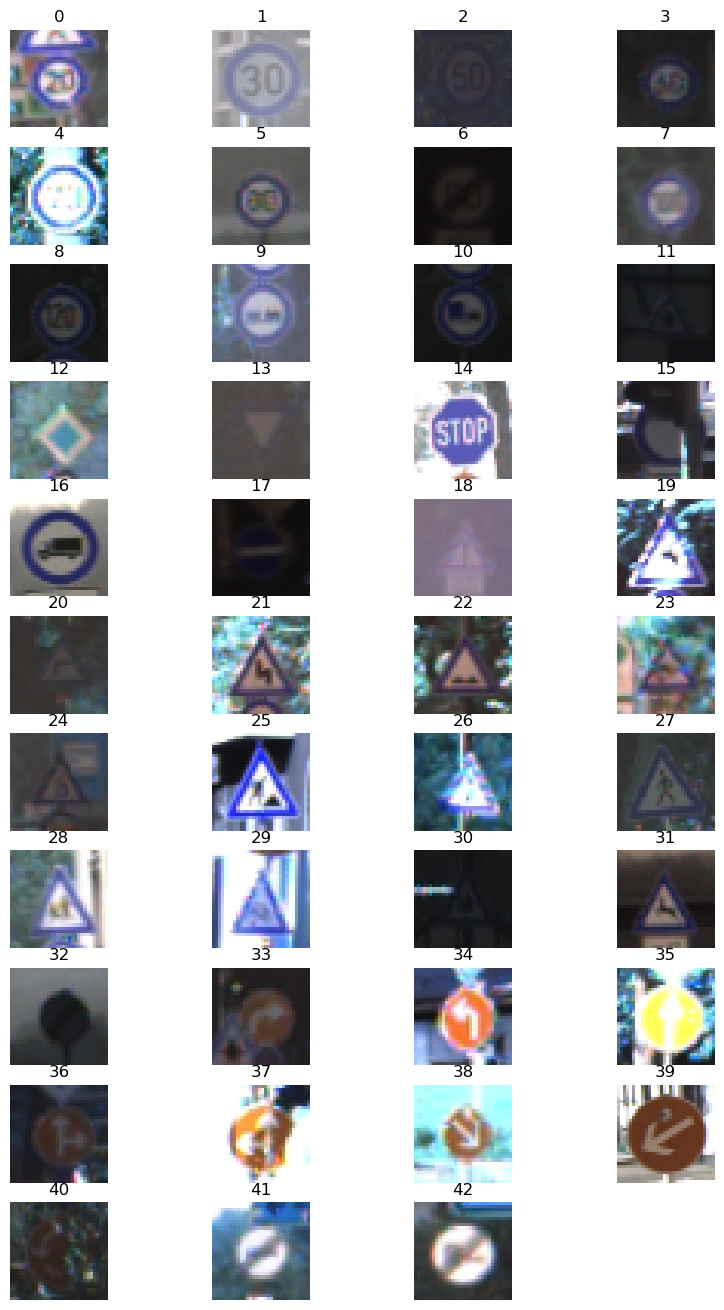

In [7]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
from random import randint
# Visualizations will be shown in the notebook.
%matplotlib inline

num_of_samples=[]
plt.figure(figsize=(10, 16.5))
for i in range(0, n_classes):
    plt.subplot(11, 4, i+1)
    x_selected = X_train[y_train == i]
    plt.imshow(x_selected[0, :, :, :]) #draw the first image of each class
    plt.title(i)
    plt.axis('off')
    num_of_samples.append(len(x_selected))
plt.show()

trail


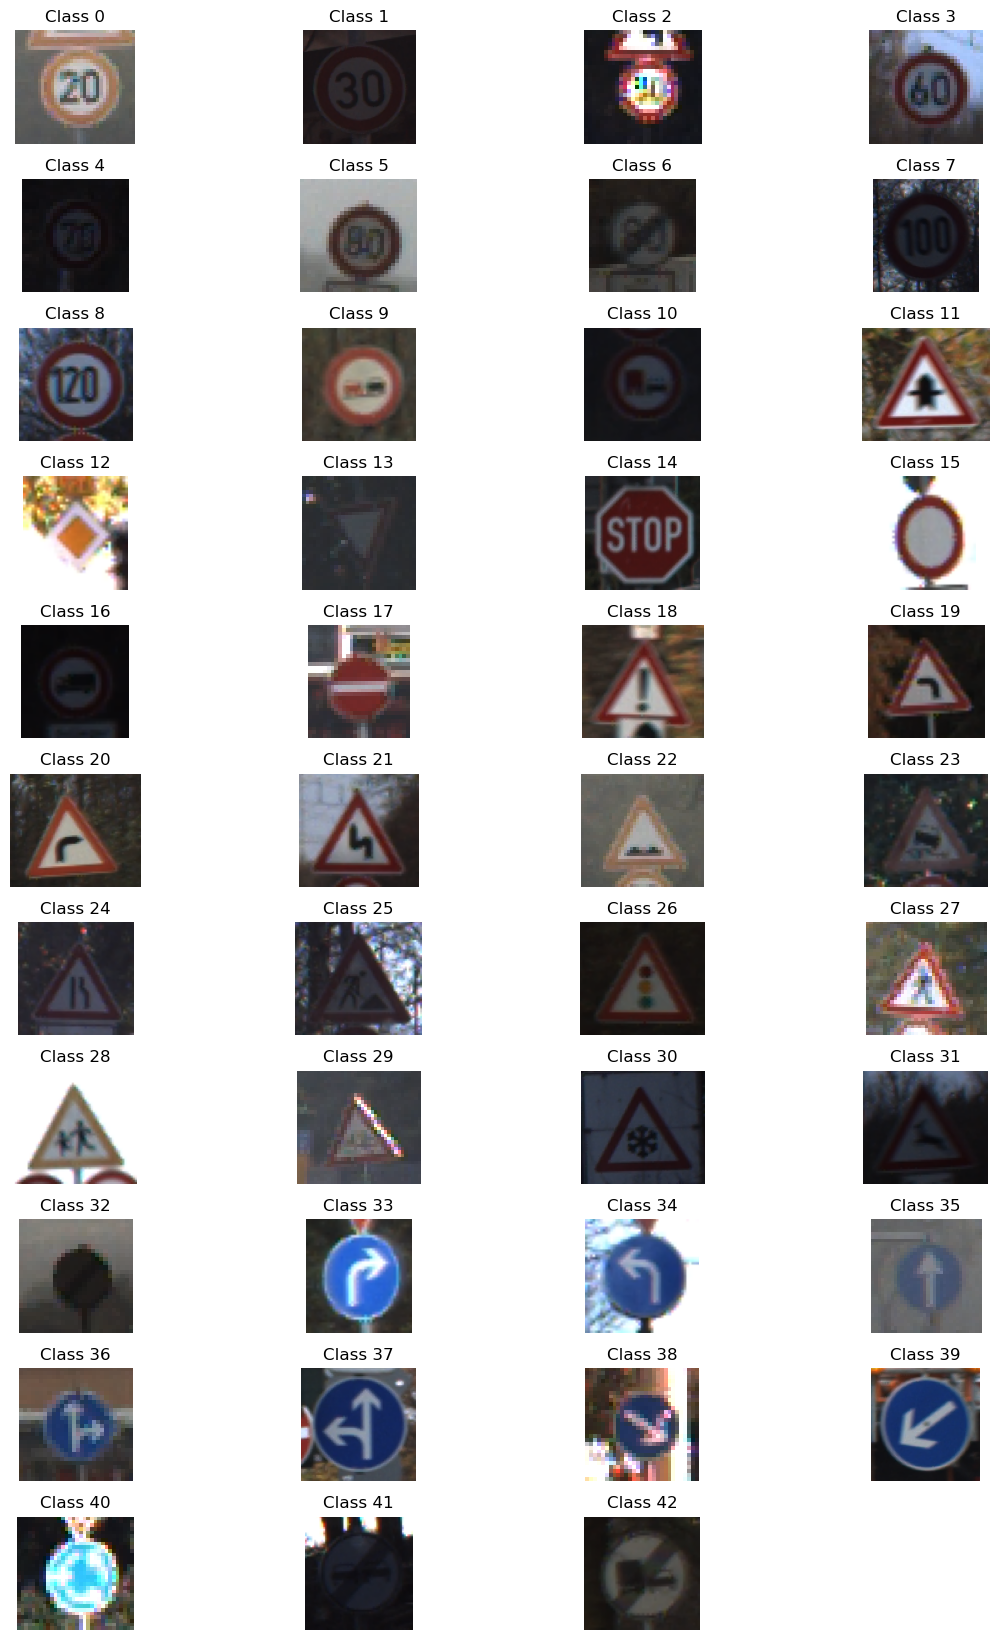

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load the CSV file
data_path = "C:/Users/Reshma Maddu/OneDrive/ml lab/proje t/archive/Train.csv"  # Update with your local path
data = pd.read_csv(data_path)

# Define number of classes and initialize sample count list
n_classes = data['ClassId'].nunique()
num_of_samples = []

# Plotting the sample images for each class with file existence check
plt.figure(figsize=(12, 16.5))
for i in range(n_classes):
    plt.subplot(11, 4, i + 1)

    # Select a random image from the class
    class_data = data[data['ClassId'] == i]
    random_sample_path = class_data.sample(1).iloc[0]['Path']
    image_path = "C:/Users/Reshma Maddu/OneDrive/ml lab/proje t/archive/" + random_sample_path  # Update with the correct base directory path

    # Check if the file exists, and load it if it does
    if os.path.exists(image_path):
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) if img is not None else np.zeros((32, 32, 3), dtype=np.uint8)
    else:
        # Fallback to an empty image if file is missing
        img = np.zeros((32, 32, 3), dtype=np.uint8)

    plt.imshow(img)
    plt.title(f"Class {i}")
    plt.axis('off')
    num_of_samples.append(len(class_data))

plt.tight_layout()
plt.show()


Data type: uint8
Min pixel value: 0
Max pixel value: 255


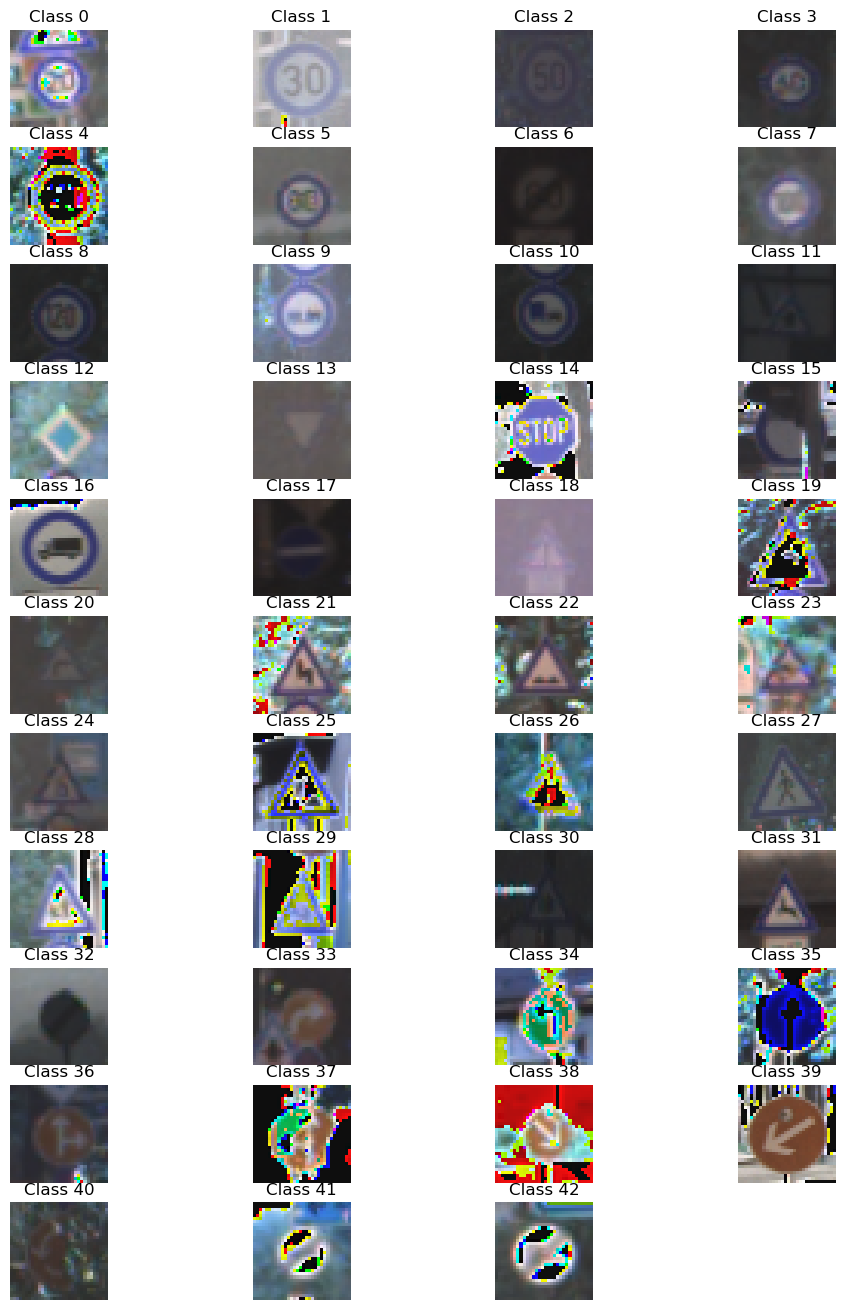

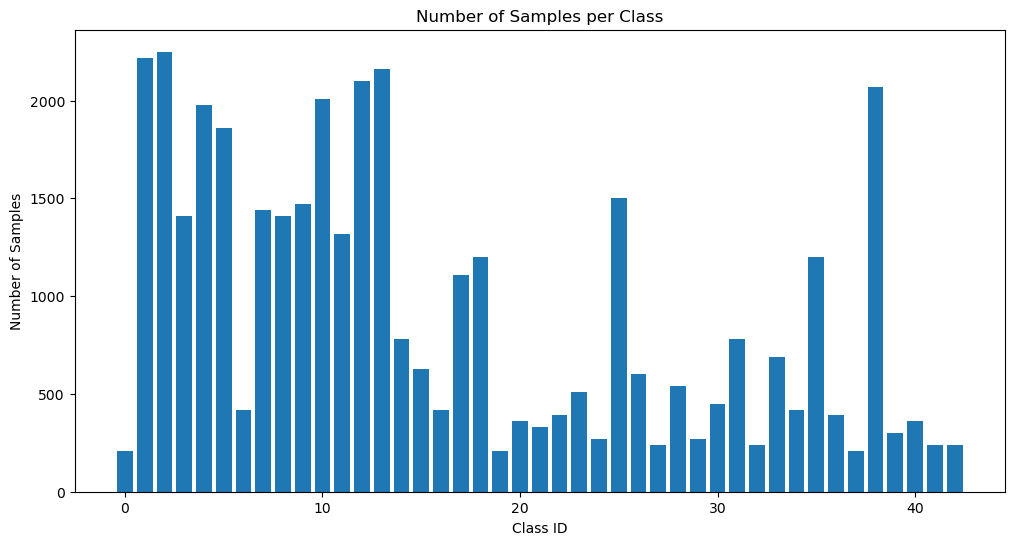

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from random import randint

# Check the data range in X_train to determine if scaling is necessary
print("Data type:", X_train.dtype)
print("Min pixel value:", X_train.min())
print("Max pixel value:", X_train.max())

# Scale data if necessary
if X_train.max() <= 1:
    X_train = (X_train * 255).astype(np.uint8)  # Scale from [0, 1] to [0, 255]
elif X_train.min() < 0:
    X_train = ((X_train - X_train.min()) / (X_train.max() - X_train.min()) * 255).astype(np.uint8)  # Scale from any range to [0, 255]

# Assuming n_classes is set to the number of unique classes
n_classes = len(np.unique(y_train))

# List to hold the count of samples for each class
num_of_samples = []

# Function to adjust brightness
def adjust_brightness(image, brightness=15):
    return np.clip(image + brightness, 0, 255).astype(np.uint8)

# Set up the plot size
plt.figure(figsize=(12, 16.5))

# Loop over each class to plot an example image and count samples
for i in range(n_classes):
    # Get all images in the current class
    x_selected = X_train[y_train == i]

    # Apply brightness adjustment if needed
    brightened_image = adjust_brightness(x_selected[0])

    # Plotting the adjusted image of each class
    plt.subplot(11, 4, i + 1)
    plt.imshow(brightened_image)
    plt.title(f"Class {i}")
    plt.axis('off')

    # Count number of samples in this class and add to the list
    num_of_samples.append(len(x_selected))

plt.show()

# Plotting the distribution of samples per class
plt.figure(figsize=(12, 6))
plt.bar(range(n_classes), num_of_samples)
plt.title("Number of Samples per Class")
plt.xlabel("Class ID")
plt.ylabel("Number of Samples")
plt.show()


** Preprocess the Data Set (normalization, grayscale, etc.)**

In [11]:
# ### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
# ### Feel free to use as many code cells as needed.


# import cv2
# from numpy import newaxis


# # Iterates through grayscale for each image in the data
# def gray_maker(data):
#     gray_images = []
#     for image in data:
#         gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#         gray_images.append(gray)
#     return np.array(gray_images)


# def preprocess(data,data_name,verbose):
#     if verbose:
#         print('Preprocessing '+ data_name + '...')

#     # Iterate through grayscale
#     data = gray_maker(data)
#     data = data[..., newaxis]

#     #Normalizes the data between 0.1 and 0.9 instead of 0 to 255
#     data = data / 255 * 0.8 + 0.1

#     if verbose:
#         print('Finished preprocessing '+ data_name + '...')

#     # Double-check that the image is changed to depth of 1
#     image_shape = data.shape

#     if verbose:
#         print('Processed '+ data_name + ' shape =', image_shape)
#         print(" ")
#     return data

import cv2
import numpy as np

# Converts RGB images in the dataset to grayscale
def gray_maker(data: np.ndarray) -> np.ndarray:
    if not isinstance(data, np.ndarray) or len(data) == 0:
        raise ValueError("Input data must be a non-empty NumPy array of images.")
    
    gray_images = []
    for image in data:
        if len(image.shape) == 3:
            if image.shape[2] == 3:  # RGB image
                gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
            elif image.shape[2] == 1:  # Already grayscale with depth axis
                gray = image.squeeze(axis=2)  # Remove the depth axis
            else:
                raise ValueError(f"Unexpected number of channels in image: {image.shape[2]}.")
        elif len(image.shape) == 2:  # Already grayscale without depth axis
            gray = image
        else:
            raise ValueError(f"Unexpected image shape: {image.shape}.")
        gray_images.append(gray)
    
    return np.array(gray_images)


# Preprocesses the dataset
def preprocess(data: np.ndarray, data_name: str, verbose: bool = False) -> np.ndarray:
    if verbose:
        print(f"Preprocessing {data_name}...")

    # Convert images to grayscale
    try:
        data = gray_maker(data)
    except Exception as e:
        raise ValueError(f"Error during grayscale conversion: {e}")
    
    # Add a new axis to match expected input dimensions (height, width, 1)
    data = data[..., np.newaxis]

    # Normalize data between 0.1 and 0.9
    data = data.astype(np.float32) / 255.0  # Scale to [0, 1]
    data = data * 0.8 + 0.1  # Scale to [0.1, 0.9]

    if verbose:
        print(f"Finished preprocessing {data_name}...")
        print(f"Processed {data_name} shape = {data.shape}")
        print(" ")
    
    return data





In [12]:

X_train = preprocess(X_train,'train_data',verbose = True)
X_test = preprocess(X_test,'test_data',verbose = True)



Preprocessing train_data...
Finished preprocessing train_data...
Processed train_data shape = (39209, 32, 32, 1)
 
Preprocessing test_data...
Finished preprocessing test_data...
Processed test_data shape = (12630, 32, 32, 1)
 


**After Preprocessing**

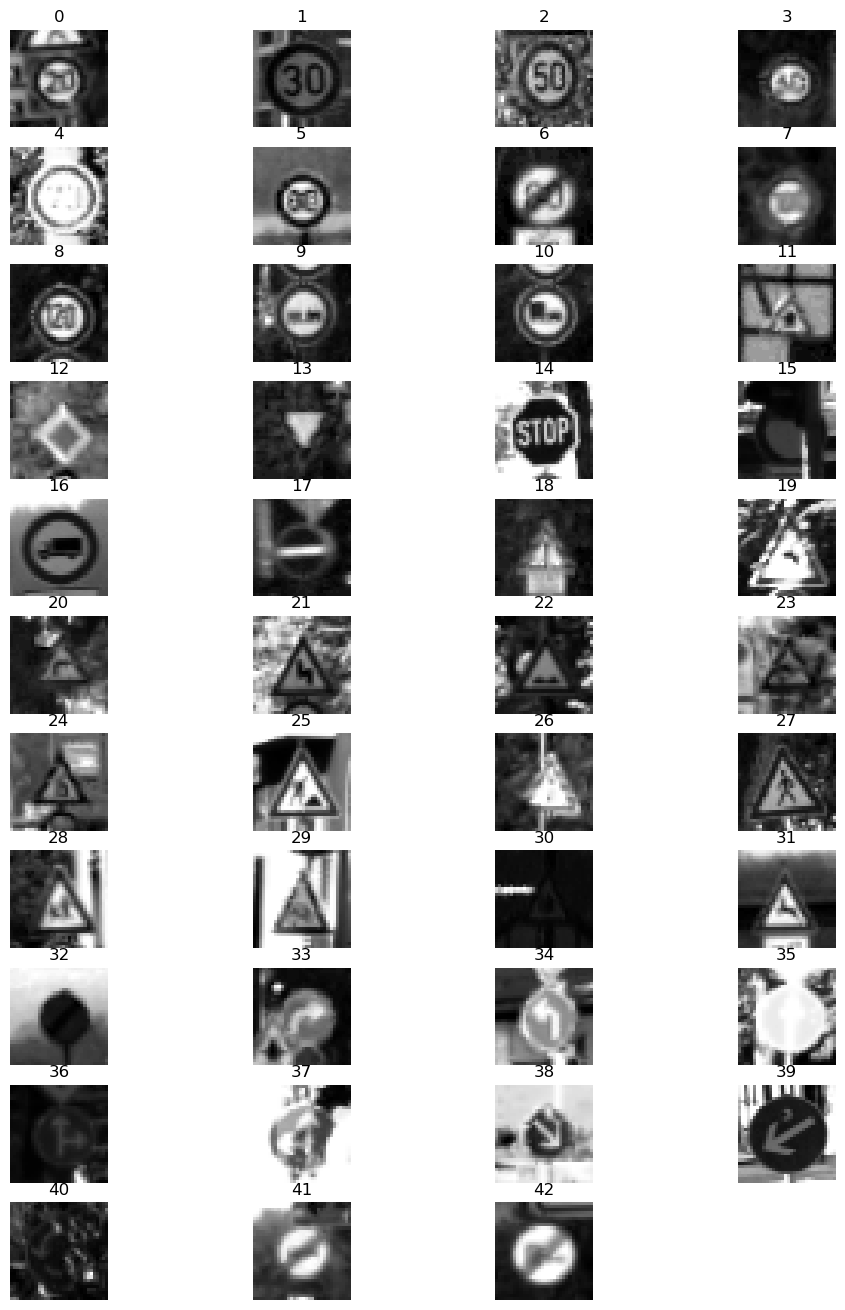

In [13]:
# Visualizations will be shown in the notebook.
%matplotlib inline

num_of_samples=[]
plt.figure(figsize=(12, 16.5))
for i in range(0, n_classes):
    plt.subplot(11, 4, i+1)
    x_selected_grey = X_train[y_train == i]
    #draw the first image of each class
    plt.imshow(x_selected_grey[0, :, :, 0], cmap = 'gray')
    plt.title(i)
    plt.axis('off')
    num_of_samples.append(len(x_selected))
plt.show()

**Generate fake data**

In [14]:
### Generate fake data
from scipy import ndimage
import random

# min_desired below is just mean_pics but wanted to
# make the code below easier to distinguish

def fake_data_generator(X,y,verbose):

    '''X = feature data , y = label data'''

    pics_per_class = np.bincount(y)
    mean_pics = int(np.mean(pics_per_class))

    if verbose:
        print('Generating new data.')

    # Angles to be used to rotate images in additional data made
    angles = [-10, 10, -15, 15, -20, 20]

    # Iterate through each class
    for i in range(len(pics_per_class)):

        # Check if less data than the mean
        if pics_per_class[i] < mean_pics:

            # Count how many additional pictures we want
            new_wanted = mean_pics - pics_per_class[i]
            picture = np.where(y == i)
            more_X = []
            more_y = []

            # Make the number of additional pictures needed to arrive at the mean
            for num in range(new_wanted):

                # Rotate images and append new ones to more_X, append the class to more_y
                more_X.append(ndimage.rotate(X[picture][random.randint(0,pics_per_class[i] - 1)],\
                                         random.choice(angles), reshape=False))
                more_y.append(i)

            # Append the pictures generated for each class back to the original data
            X = np.append(X, np.array(more_X), axis=0)
            y = np.append(y, np.array(more_y), axis=0)

    if verbose:
        print('Additional data generated. Any classes lacking data now have',mean_pics, 'pictures.')
    return X,y

In [15]:
X_train, y_train = fake_data_generator(X_train,y_train,verbose = True)

Generating new data.
Additional data generated. Any classes lacking data now have 911 pictures.


** Histogram representing data distribution in all classes**

The updated number of training examples = 52396


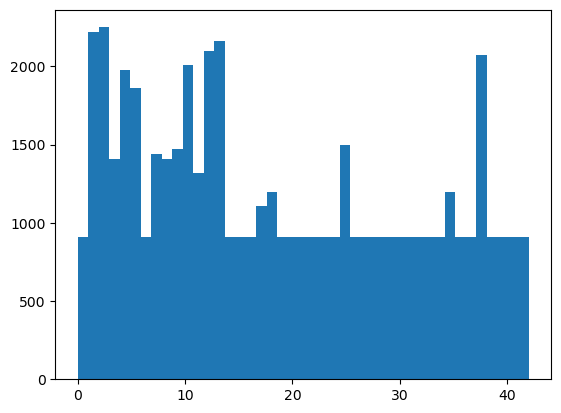

In [16]:
plt.hist(y_train, bins = n_classes)
updated_n_train = len(X_train)
print("The updated number of training examples =", updated_n_train)

Data summary

In [18]:
n_train = X_train.shape[0]
n_test = X_test.shape[0]
print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Extra data generated =",n_train-34799)

Number of training examples = 52396
Number of testing examples = 12630
Extra data generated = 17597


Splitting Train and Validation data

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle # import shuffle function from sklearn.utils

# shuffleing data
X_train, y_train = shuffle(X_train, y_train)

# For each epoch, there are separate training data and validation data
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,stratify = y_train,test_size=0.1,random_state=23)

n_train = X_train.shape[0]
n_valid = X_valid.shape[0]
print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)

Number of training examples = 42440
Number of validation examples = 4716


In [ ]:

batch_size = 64
learning_rate = 0.001
num_epochs = 10
num_classes = len(np.unique(y_train)) 



train_dataset = TrafficSignDataset(X_train, y_train)
test_dataset = TrafficSignDataset(X_valid, y_valid)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the CNN model, loss, and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = TrafficSignCNN(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training Loop
def train_model(model, loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

# Evaluation Function
def evaluate_model(model, loader, criterion, device):
    model.eval()
    total_loss = 0
    correct = 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
    accuracy = correct / len(loader.dataset)
    return total_loss / len(loader), accuracy



# Training Loop
for epoch in range(10):  # Adjust as needed
    train_loss = train_model(model, train_loader, criterion, optimizer, device)
    test_loss, test_accuracy = evaluate_model(model, test_loader, criterion, device)
    print(f"Epoch {epoch+1}/10, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch 1/10, Train Loss: 1.5424, Test Loss: 0.4953, Test Accuracy: 0.8528
Epoch 2/10, Train Loss: 0.3132, Test Loss: 0.2403, Test Accuracy: 0.9249
Epoch 3/10, Train Loss: 0.1708, Test Loss: 0.1730, Test Accuracy: 0.9521
Epoch 4/10, Train Loss: 0.1141, Test Loss: 0.1272, Test Accuracy: 0.9680
Epoch 5/10, Train Loss: 0.0856, Test Loss: 0.0906, Test Accuracy: 0.9737
Epoch 6/10, Train Loss: 0.0656, Test Loss: 0.0767, Test Accuracy: 0.9803
Epoch 7/10, Train Loss: 0.0453, Test Loss: 0.1017, Test Accuracy: 0.9697
